In [39]:
#pip install pandas numpy matplotlib scikit-learn

In [53]:
%matplotlib inline

In [2]:
# Import necessary libraries
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# Load the shapefile
florida_shapefile = gpd.read_file('tl_2020_12_tract/tl_2020_12_tract.shp')

In [4]:
# Load the data
df = pd.read_csv('Florida_ct.csv')

In [5]:
# Ensure the data type matches for merging
florida_shapefile['GEOID'] = florida_shapefile['GEOID'].astype('int64')
df['full_ct_fips'] = df['full_ct_fips'].astype('int64')

In [6]:
# Selecting as 2D array for consistency with sklearn
X = df[['travel_driving_ratio']].values  

In [7]:
# It's common to standardize variables for KMeans, but since we're using only one variable, it's optional
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Perform KMeans clustering on the scaled features, specifying 2 clusters and a random state for reproducibility
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
df['cluster'] = kmeans.labels_

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
# Merge the cluster labels into the shapefile GeoDataFrame
df_shp = florida_shapefile.merge(df,
                                 how='left',
                                 left_on='GEOID',
                                 right_on='full_ct_fips')

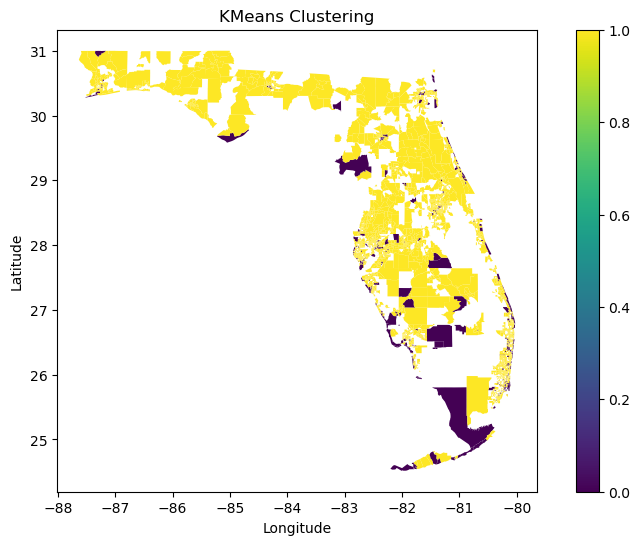

In [10]:
# Plot the shapefile with clustering results
fig, ax = plt.subplots(figsize=(10, 6))
df_shp.plot(ax=ax, column='cluster', cmap='viridis', legend=True, edgecolor='none')
plt.title('KMeans Clustering')
plt.xlabel('Longitude') 
plt.ylabel('Latitude')
plt.show()